In [293]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

In [294]:
X = np.loadtxt('X.txt')
Y = np.loadtxt('Y.txt')

In [295]:
X.shape

(1000, 2)

In [296]:
Y.shape

(1000,)

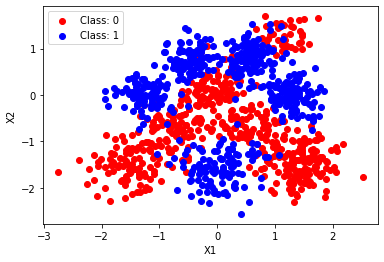

In [297]:
def plot_classes_2D(x, y, colours):
    for index, label in enumerate(np.unique(y)):
        x1 = [x[i,0] for i in range(x.shape[0]) if y[i] == label]
        x2 = [x[j,1] for j in range(x.shape[0]) if y[j] == label]
        plt.scatter(x1, x2, c=colours[index], label='Class: '+str(int(label)))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

c = ['r', 'b']
plot_classes(X, Y, c)

The data clearly has a very non-linear decision boundary

In [380]:
def logistic(z):
    return 1. / (1. + np.exp(-1*z))

def create_X_tilde(x):
    ones = np.ones((x.shape[0], 1))
    return np.concatenate((ones, x), axis=1)

def calc_grad(beta, x, y):
    dot_prod = np.matmul(x, beta)
    sigmas = logistic(dot_prod)
    return np.dot(x.T, (np.multiply(y, 1-sigmas) + np.multiply(1-y, sigmas)))

def calc_likelihood(beta, x, y):
    dot_prod = np.matmul(x, beta)
    sigmas = logistic(dot_prod)
    return np.dot(y.T, sigmas) + np.dot((1-y).T, (1-sigmas).T)

In [381]:
X_tilde = create_X_tilde(X)
X_tilde_train, X_tidle_test, Y_train, Y_test = sk.train_test_split(X_tilde, Y, train_size=0.8)

In [382]:
learning_rate = 0.1
beta = np.random.normal(size=X_tilde.shape[1])
steps = 50000
likelihoods = []
for _ in range(steps):
    beta = beta + learning_rate * calc_grad(beta, X_tilde_train, Y_train)
    likelihood = calc_likelihood(beta, X_tilde_train, Y_train)
    likelihoods.append(likelihood)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


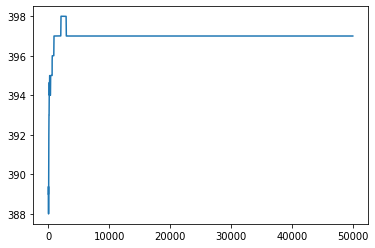

In [383]:
axis = np.arange(steps)
plt.plot(axis, likelihoods)

In [386]:
logistic(np.dot(X_tilde_train, beta))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [387]:
Y_train

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1.